In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

### Load  Dataset

In [5]:
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

### Reshape Dataset
To match the input and output dimensions of the model

In [6]:
X_train = X_train.reshape(len(X_train), 100, 100, 3) # (number of images, height, width, channels)
Y_train = Y_train.reshape(len(Y_train), 1) # target variables (labels) need to be in a 2D format

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

In [7]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (2000, 100, 100, 3)
Y_train shape:  (2000, 1)
X_test shape:  (400, 100, 100, 3)
Y_test shape:  (400, 1)


### Normalize RGB values

In [8]:
X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

### Show random image of the Dataset

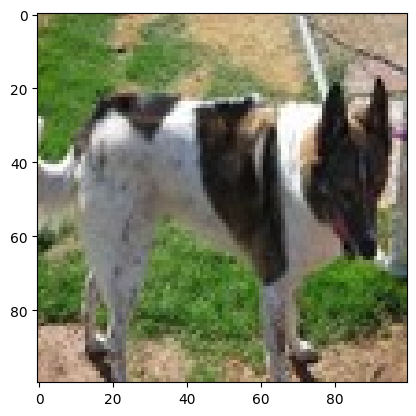

In [14]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

### Build, Compile and Train Model

In [22]:
# Build Model (stacking 3 layers in sequence)
model = Sequential(
    [
        Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
        MaxPooling2D((2,2)),

        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D((2,2)),

        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)
# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train Model
model.fit(X_train, Y_train, epochs=10, batch_size=64)

Epoch 1/10
32/32 [==============================] - 4s 102ms/step - loss: 0.7164 - accuracy: 0.5360
Epoch 2/10
32/32 [==============================] - 3s 108ms/step - loss: 0.6887 - accuracy: 0.5565
Epoch 3/10
32/32 [==============================] - 3s 103ms/step - loss: 0.6636 - accuracy: 0.6025
Epoch 4/10
32/32 [==============================] - 3s 107ms/step - loss: 0.5995 - accuracy: 0.6770
Epoch 5/10
32/32 [==============================] - 3s 105ms/step - loss: 0.5434 - accuracy: 0.7330
Epoch 6/10
32/32 [==============================] - 4s 118ms/step - loss: 0.4858 - accuracy: 0.7680
Epoch 7/10
32/32 [==============================] - 4s 128ms/step - loss: 0.4445 - accuracy: 0.7920
Epoch 8/10
32/32 [==============================] - 4s 116ms/step - loss: 0.3902 - accuracy: 0.8170
Epoch 9/10
32/32 [==============================] - 4s 130ms/step - loss: 0.3550 - accuracy: 0.8455
Epoch 10/10
32/32 [==============================] - 4s 122ms/step - loss: 0.2927 - accuracy: 0.8835

### Evaluate/ Test Model

In [23]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 17ms/step - loss: 0.6630 - accuracy: 0.6750


[0.662981390953064, 0.675000011920929]

### Make Predictions

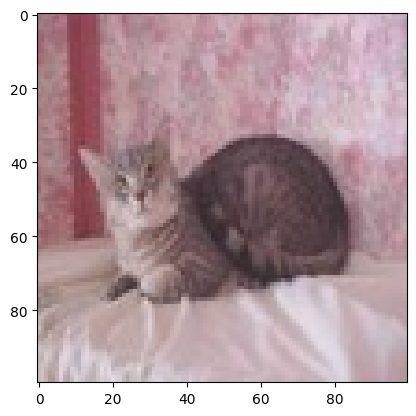

1/1 [==============================] - 0s 16ms/step
Model prediction:  cat


In [26]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Model prediction: ", pred)